<a href="https://colab.research.google.com/github/M-MSilva/Customer-Segmentation_End-to-end-Project/blob/master/jupyter_notebook/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Segmentation End-to-end Project

In addition to segmenting customers with machine learning algorithms, we will also answer some business questions:

1.   How graphically do sales change over time? What is the maximum sales peak? When did this peak sales peak occur?
2.   Which month does the highest sales volume occur?
3.   What are the other standards for higher sales volume, such as which product line sells the most?
4. What are the companies or customers that sell the most?
5. Is it possible to segment customers? If yes, what are the patterns of these customer groups?


## 1 - Initial Requirements

Always at the beginning of a project we must import some elementary libraries.

In [68]:
import numpy as np
import pandas as pd

#images
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme()

## 2 - Get the Data

In [69]:
CustomerDataset = pd.read_csv("D:\Customer-Segmentation_End-to-end-Project-master\sales_data_sample.csv")

## 3 - Initial Data Insights

This dataset was extracted from the website 'https://www.kaggle.com/datasets/kyanyoga/sample-sales-data'.

In [70]:
CustomerDataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### 3.1 Small Glossary


*   STATUS - order armadillos whether it was shipped or not;
*   QTR_ID - It's the Quarters of the Year;
*   MSRP - Manufacturer's suggested retail price;
*   DEALSIZE - If there will be many products or few that are purchased.
*   SALES = QUANTITYORDERED	* PRICEEACH (the value of each product above 100 has been rounded)



### 3.2 - Dataset Summary

In [71]:
CustomerDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


With this, we understand that our dataset has 16 categorical and 9 numeric attributes, totaling 24 columns with 2822 rows.

### 3.3 - Understanding the data

Now that we know what our numeric attributes are, we can plot them in the form of a histogram. Let's plot various information on the x-axis by the frequency density on the y-axis.

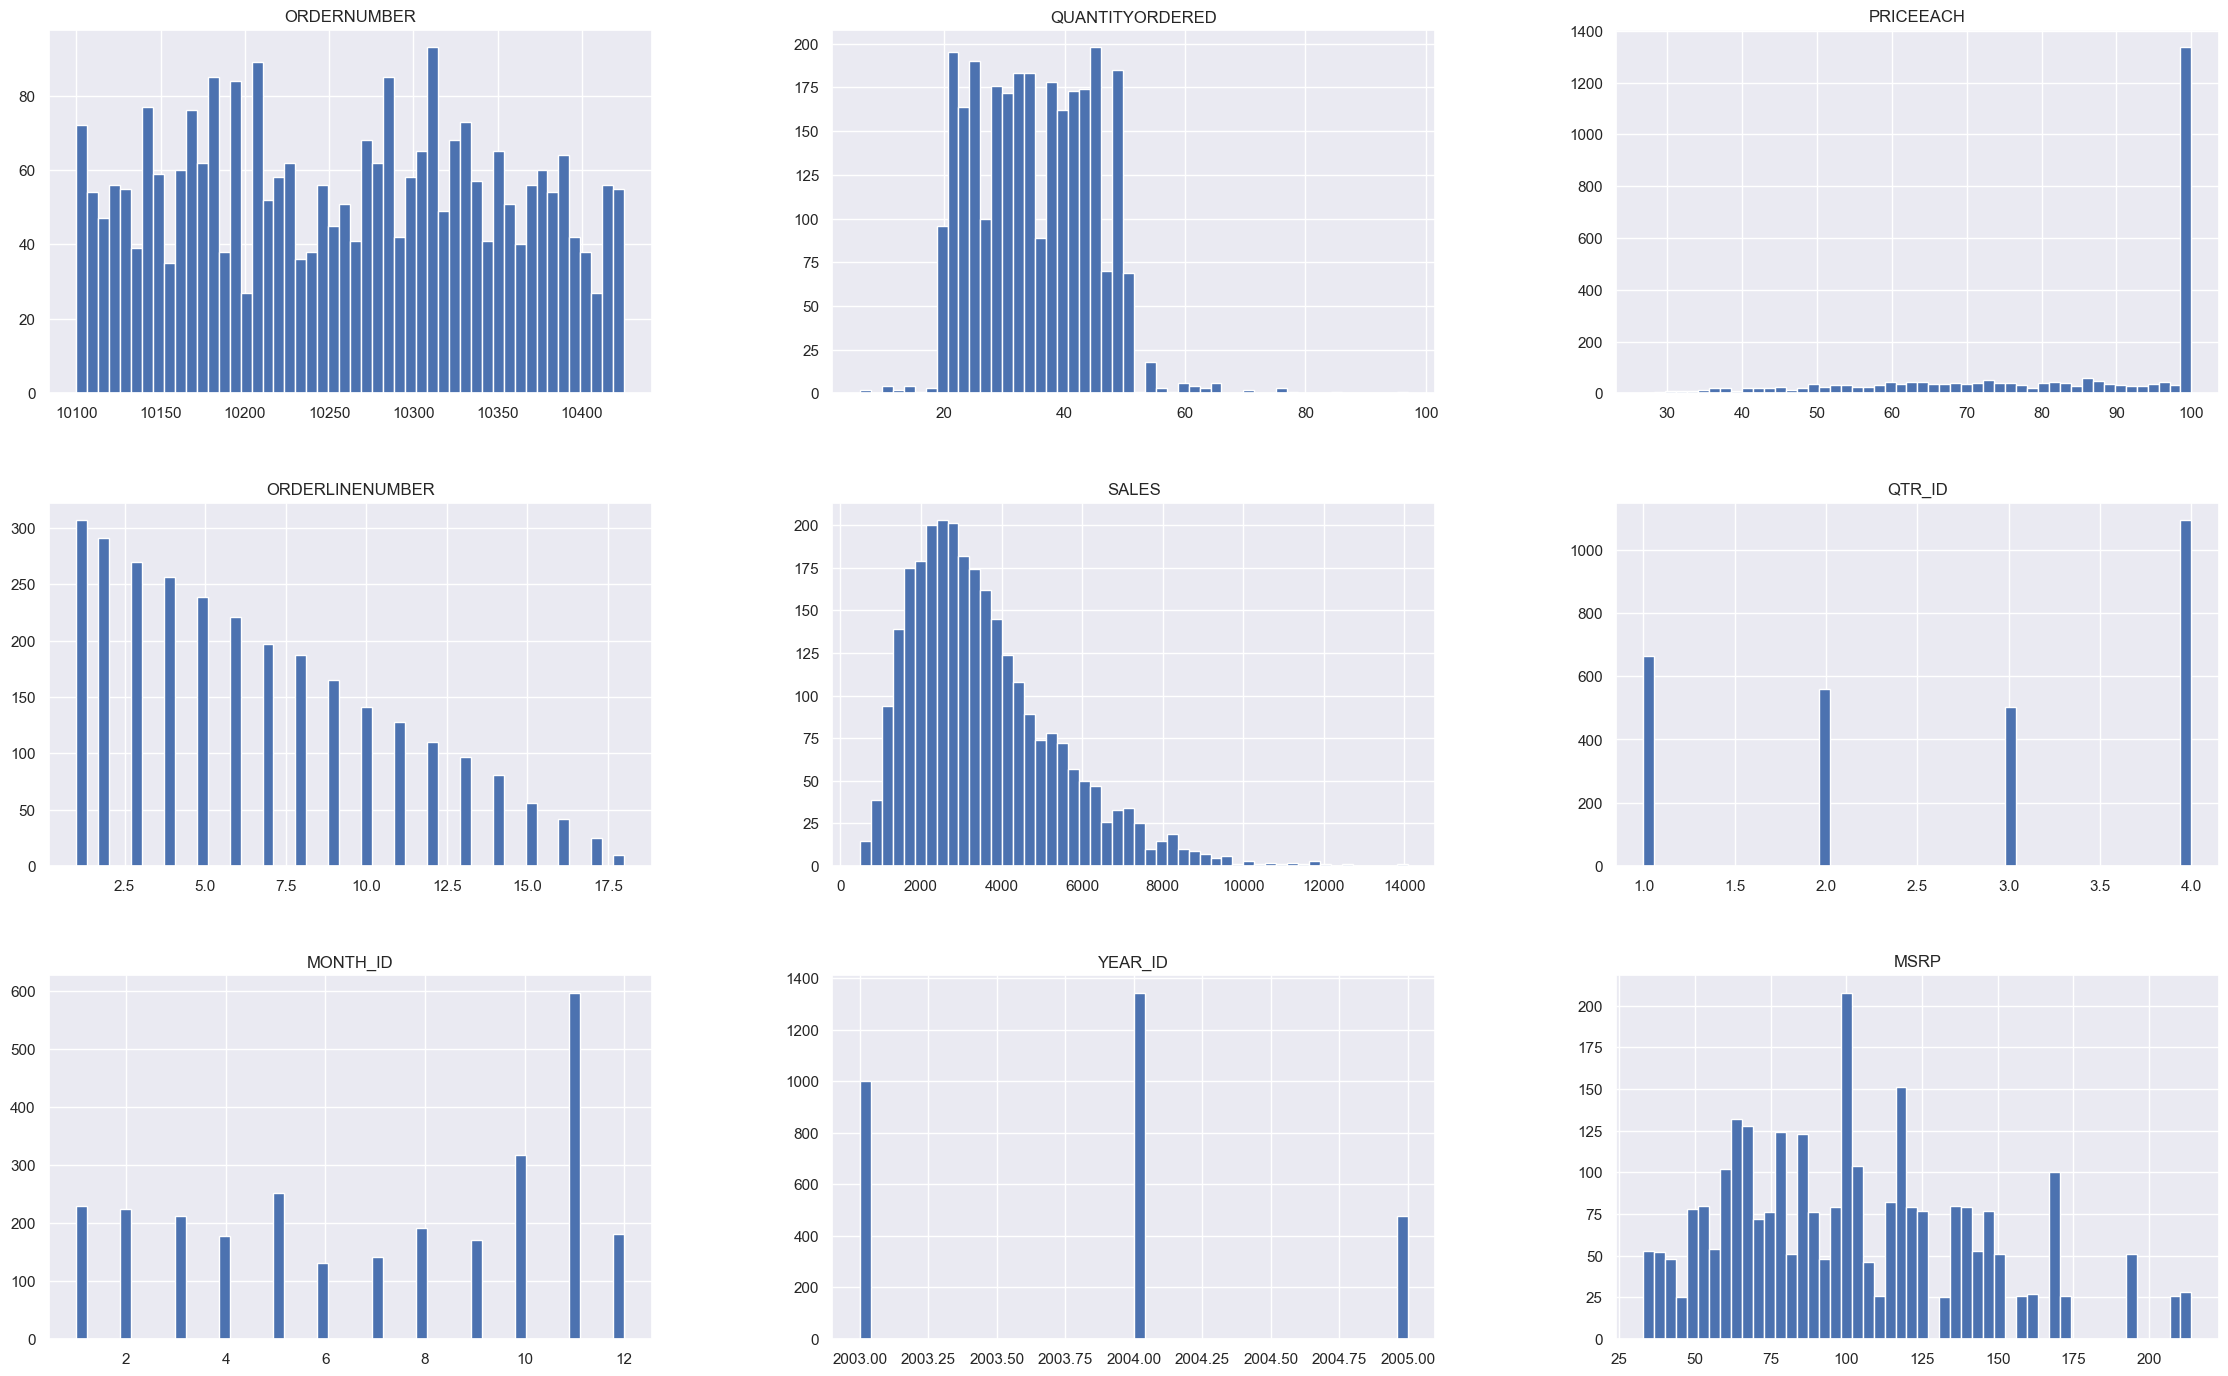

In [72]:
CustomerDataset.hist(bins=50, figsize=(28,17))
plt.show()

It appears that some of the data, such as the ORDERLINENUMBER, may not be entirely coherent. However, we can leverage other attributes for analysis. For instance, the QUANTITY ORDERED shows a high frequency, with nearly 200 orders being the most common.

The price distribution exhibits a long tail, as does the month attribute. We will need to address these long tails during our analysis. Additionally, our sales graph resembles a Gaussian distribution, which is encouraging as it suggests the data is relatively well-distributed.

We observe a peak frequency occurring at around 200 instances of 3,500 sales. This pattern aligns closely with the Manufacturer's Suggested Retail Price (MSRP), which is expected. Overall, these insights will guide our approach to processing and analyzing the dataset effectively.

In [73]:
CustomerDataset.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


What stands out in this description is the high value of the standard deviation of sales, which indicates that the sales values are far from the average. The 'Price of each' attribute, on the other hand, has an average a little far from the maximum value (100) which has an impressive frequency of 1300 occurrences.

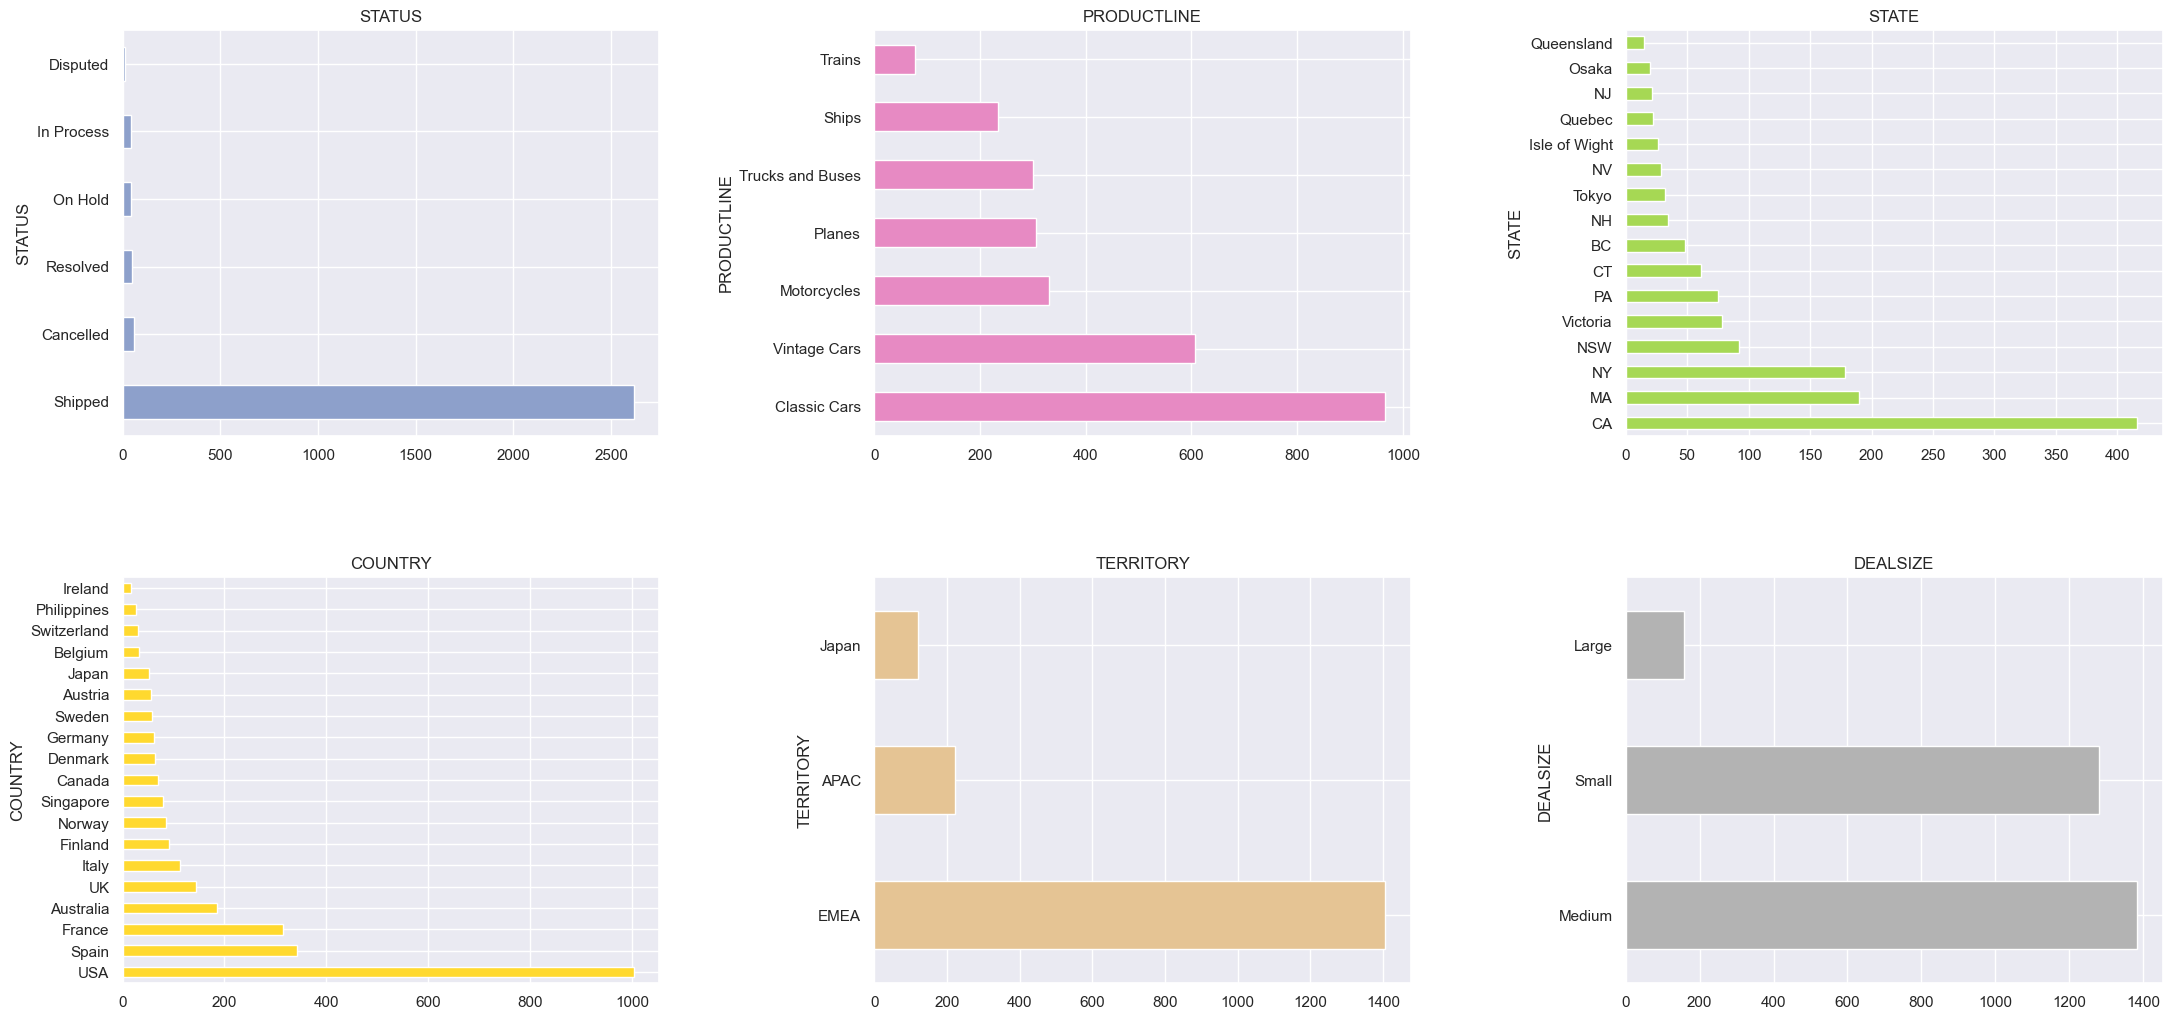

In [74]:
#so as not to spoil our original data
DataCopy = CustomerDataset.copy()

#we select the categorical attributes and pull out some data that is almost impossible to plot
DatasetAux = DataCopy.select_dtypes(include=['object']).drop(['ORDERDATE','PRODUCTCODE','CUSTOMERNAME','PHONE'
                                                        ,'ADDRESSLINE1','ADDRESSLINE2','POSTALCODE','CONTACTLASTNAME'
                                                        ,'CONTACTFIRSTNAME','CITY','ADDRESSLINE1'],axis=1)

#we create a list with the plottable categorical attributes
catList = DatasetAux.columns.to_list()


#chosen color map
cmap1 = mpl.cm.Set2

fig=plt.figure(figsize=(16,12))

#loop that plots all the data we want using the value_counts() method
for i, col in enumerate(catList):
  ax=fig.add_subplot(3,3,i+1)
  plt.xlabel('Number of Occurrences')
  plt.ylabel('Categories')
  valuec = DataCopy[col].value_counts().plot(kind='barh',title=col,color=cmap1(i + 2),grid=True,ax=ax)
  plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.4, 
                    top=1.35, 
                    wspace=0.4, 
                    hspace=0.35)
plt.show()


## 4 - Visualizing data




After analyzing our data, we need to address some key business questions before proceeding to the machine learning model. The first question is: How do sales in our dataset change over time? We will look for trends and patterns in sales figures across different time periods.

Next, we’ll identify the maximum sales peak and determine the date on which this peak occurred. This information will be crucial for understanding sales performance and identifying potential seasonal effects. By exploring these aspects, we can gain a clearer picture of sales dynamics and make informed decisions moving forward.

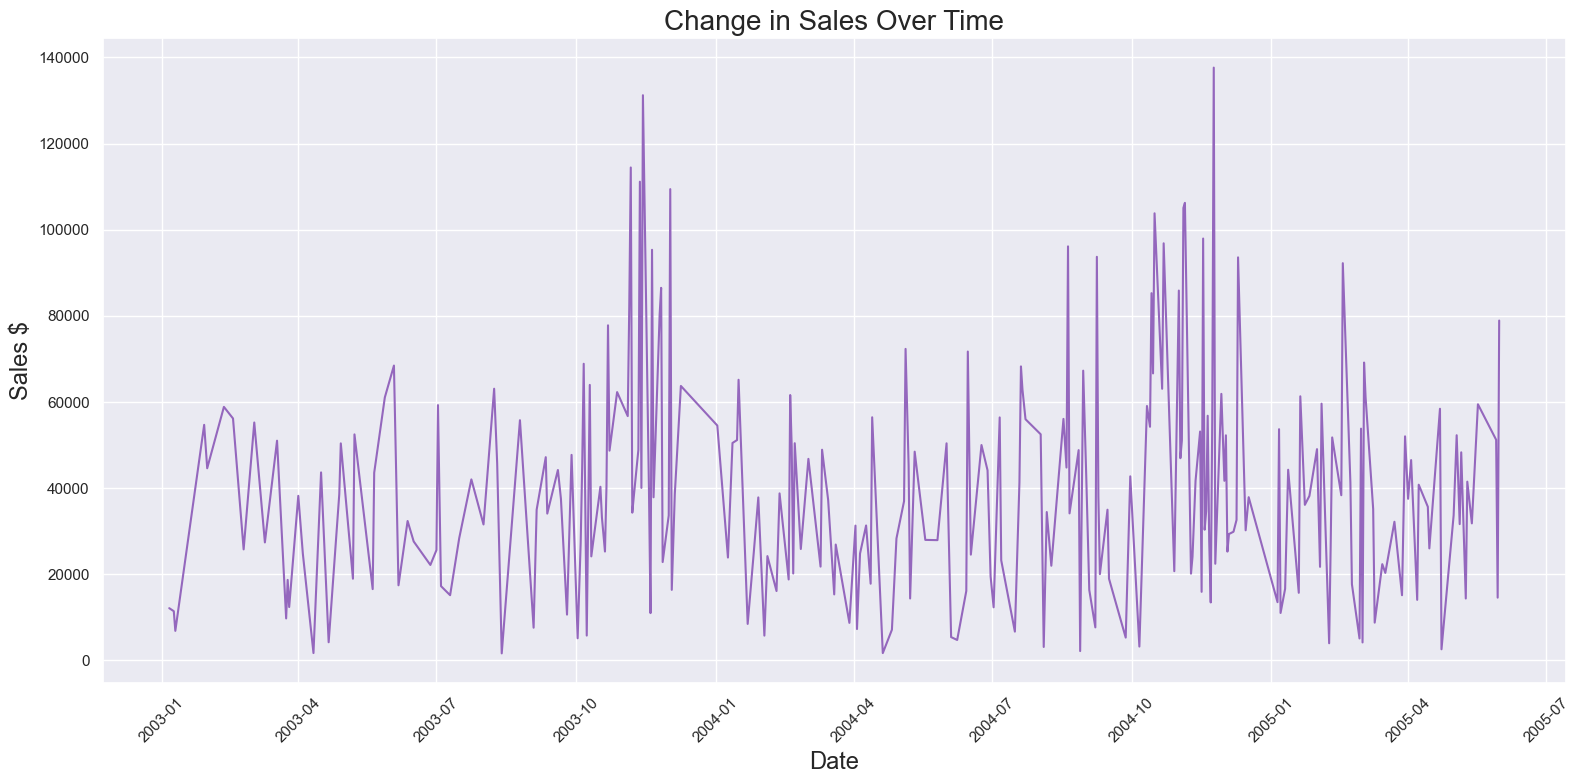

In [75]:
#Convert order date to datetime format
DataCopy['ORDERDATE'] = pd.to_datetime(DataCopy['ORDERDATE'])

#we group together orders that were placed on the same date
DtGroup = DataCopy.groupby('ORDERDATE').sum()

#plotting
fig=plt.figure(figsize=(16,8))

plt.title('Change in Sales Over Time',fontsize = 20)
plt.xlabel('Date',fontsize=17)
plt.ylabel('Sales $',fontsize=17)
plt.xticks(rotation=45)
plt.plot(DtGroup.index,DtGroup.SALES,color='tab:purple')
fig.tight_layout()
plt.show()

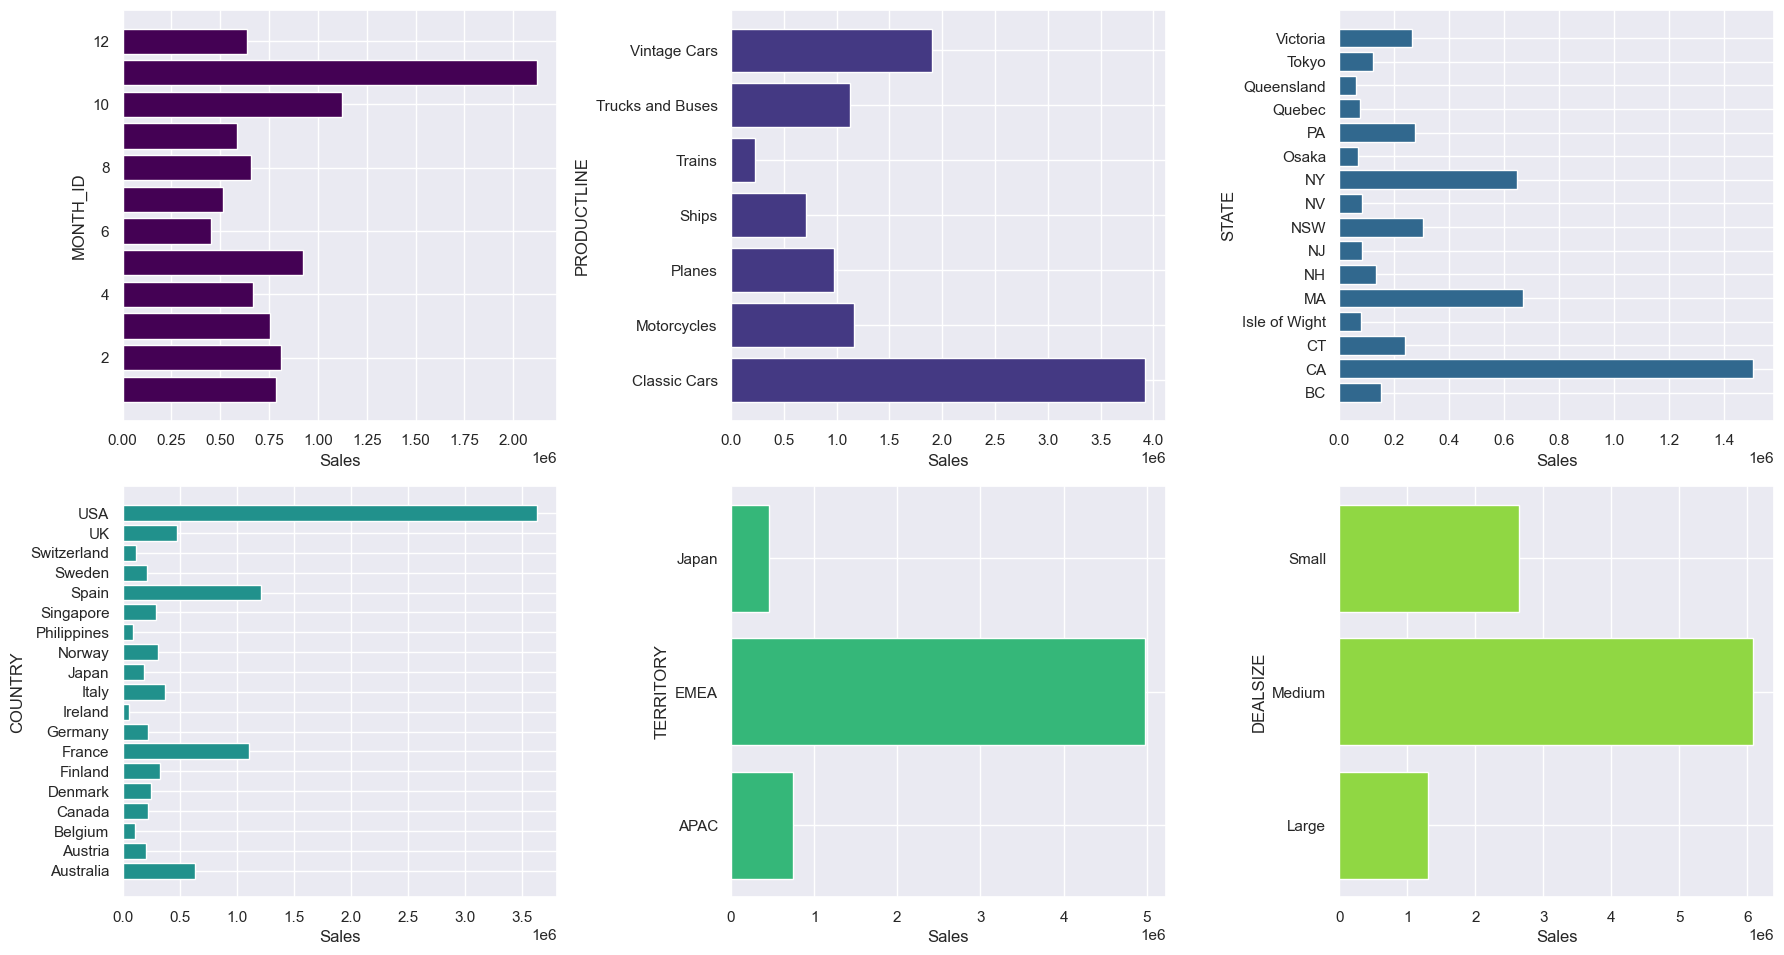

In [76]:
import matplotlib.pyplot as plt

# Correct the spelling of 'month'
labels1 = [month for month, _ in DataCopy.groupby('MONTH_ID')]
labels2 = [pl for pl, _ in DataCopy.groupby('PRODUCTLINE')]
labels3 = [state for state, _ in DataCopy.groupby('STATE')]
labels4 = [country for country, _ in DataCopy.groupby('COUNTRY')]
labels5 = [territory for territory, _ in DataCopy.groupby('TERRITORY')]
labels6 = [deal_size for deal_size, _ in DataCopy.groupby('DEALSIZE')]

# Dictionary containing the labels for plotting
player_dict = {
    'l1': labels1,
    'l2': labels2,
    'l3': labels3,
    'l4': labels4,
    'l5': labels5,
    'l6': labels6
}

# List of attributes to analyze
resultsList = ['MONTH_ID', 'PRODUCTLINE', 'STATE', 'COUNTRY', 'TERRITORY', 'DEALSIZE']

fig = plt.figure(figsize=(18, 14))

# Loop through the categories to create bar plots
for val, i in zip(enumerate(player_dict.values()), resultsList):
    # Group by the category and sum only the 'SALES' column
    results = DataCopy.groupby(i)['SALES'].sum()  # Only sum SALES
    ax = fig.add_subplot(3, 3, val[0] + 1)  # Add subplot
    ax.barh(val[1], results, color=plt.cm.viridis(val[0] / len(player_dict)))  # Use a colormap
    ax.set_ylabel(i)  # Set y-axis label
    ax.set_xlabel('Sales')  # Set x-axis label

fig.tight_layout()  # Improve spacing
plt.show()  # Display the plots


## 5 - Exploratory Data Analysis and Feature Engineering

To create a new dataset and address outlier removal thoughtfully, we first need to acknowledge that some attributes may have been derived from combinations of other attributes. Given that our histogram reveals long tails, removing outliers could lead to the loss of valuable information. Therefore, we will refrain from outlier removal for now.

To start, we’ll create a copy of our existing dataset, which will allow us to manipulate the data without affecting the original.

In [77]:
Dataset = CustomerDataset.copy()

DatasetNum = Dataset.select_dtypes(include=[np.number])#only the numerical data for later

In [78]:
DataCopy['ORDERDATE'] = pd.to_datetime(DataCopy['ORDERDATE'])
DataCopy['ORDERDATE_NUMERIC'] = (DataCopy['ORDERDATE'] - DataCopy['ORDERDATE'].min()).dt.days

In [79]:
Dataset = DataCopy.drop(columns=['ORDERDATE'])

### 5.1 Search for Correlations

In [80]:
numeric_df = Dataset.select_dtypes(include=np.number)
Matrix_corr = numeric_df.corr()
Matrix_corr['SALES'].sort_values(ascending=False) 

SALES                1.000000
PRICEEACH            0.657841
MSRP                 0.635239
QUANTITYORDERED      0.551426
ORDERNUMBER          0.039919
YEAR_ID              0.035647
ORDERDATE_NUMERIC    0.033568
QTR_ID              -0.006796
MONTH_ID            -0.009605
ORDERLINENUMBER     -0.058400
Name: SALES, dtype: float64

The correlation coefficient close to 1 reveals a positive relationship between the data, if the correlation coefficient is close to -1 it expresses a negative relationship. For example, the PRICE EACH attribute tends to increase as sales increase and vice versa.

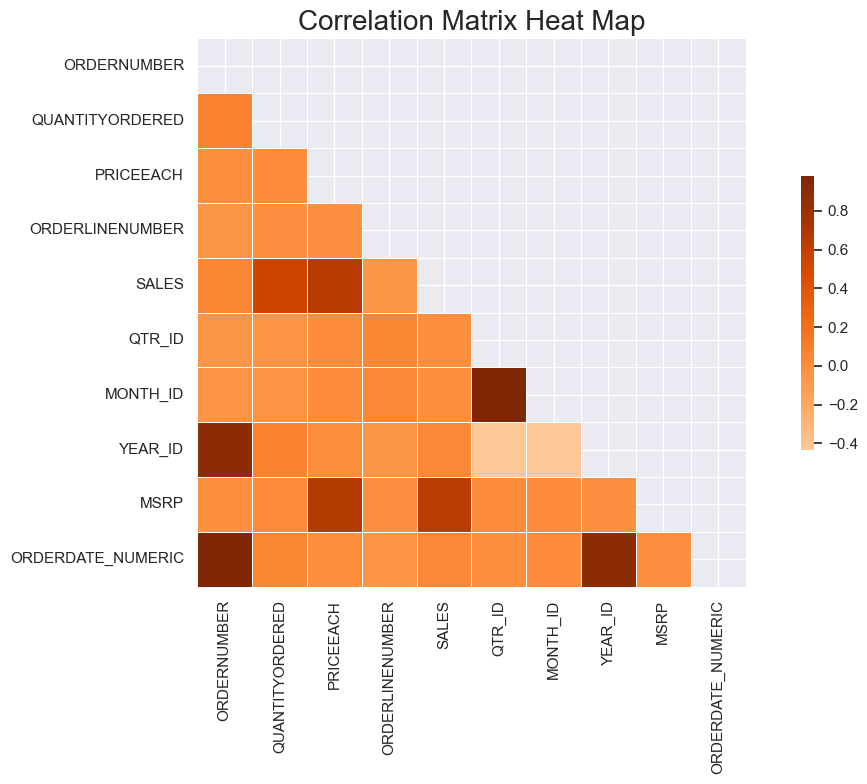

In [81]:
#we avoid a repetition of the correlation map with mask
mask = np.triu(np.ones_like(Matrix_corr))

f=plt.figure(figsize=(12,8))

#we create the heat map
graph = sns.heatmap(Matrix_corr,mask=mask,cmap=plt.get_cmap("Oranges"),center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})
graph.set_title("Correlation Matrix Heat Map",fontsize = 20)
sns.set(font_scale = 1)
f.tight_layout()

### 5.2 Prepare the Data

In [82]:
Dataset = CustomerDataset.copy()


to_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 
            'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME',
            'ORDERNUMBER', "ORDERDATE","QTR_ID","ORDERLINENUMBER","YEAR_ID","PRODUCTCODE"]

Dataset = Dataset.drop(to_drop, axis = 1) 

### 5.3 - Transformations by Pipelines (Cleaning, scaling, etc...)


To address the imperfections in our dataset, we will implement a pipeline transformation that sequentially applies various preprocessing techniques using the fit_transform() method. The steps in our pipeline are as follows:

Impute Missing Values: We will begin by filling in any missing values using the median of each column with the SimpleImputer(strategy='median') method. This approach is robust to outliers and ensures that we retain the integrity of the data.

Apply Power Transformation: Next, we will utilize the PowerTransformer() method, which applies logarithmic and power transformations to enhance the normality and symmetry of the data. This is particularly important because some of our histograms, as seen in section 3.3, display long tails. This transformation helps to produce a distribution that is closer to a Gaussian shape.

Standardize Features: Finally, we will employ the StandardScaler to normalize the features. This step involves centering the data by removing the mean and scaling it to unit variance, ensuring that all features have comparable weights in subsequent analyses.

By following these steps, we will improve the quality of our dataset and prepare it for further analysis.

In [83]:

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,PowerTransformer

Dataset_num = Dataset.select_dtypes(include=[np.number])#only the numerical data 

#pipeline that enforces the transformations
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('PowerTransformer',PowerTransformer(method='yeo-johnson',standardize=True)),
        ('scaler',StandardScaler()),
          
    ])

dataset_num_tr = num_pipeline.fit_transform(Dataset_num)

Now we join our numerical and categorical data through the ColumnTransformer and use the OneHotEncoder method, to transform words into numbers, as the models do not work with words, only numbers.

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#list the numerical data
num_attribs = list(Dataset_num)


dataset_cat =  Dataset.select_dtypes(include=['object'])#take the categorical data
cat_attribs = list(dataset_cat)#list the categorical data

#apply the total transformation to the categorical and numerical data
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs)
    ])

dataset_prepared = full_pipeline.fit_transform(Dataset)

We made the csr_matrix type of (dataset_prepared) to be an array, as in such a configuration it is much better and easier to work with.

In [85]:
dataset_prepared = dataset_prepared.toarray()

### 5.4 - Choose and Train The Model


Now, let’s proceed with implementing our K-means Clustering model. This algorithm is designed to partition data into 
𝑘
k distinct groups based on the positions of 
𝑘
k centroids within the feature space, effectively identifying clusters.

The challenge lies in selecting the optimal value for 
𝑘
k. To determine the best 
𝑘
k, we need to consider the model's performance metric known as inertia. Inertia measures the average squared distance between each data point and its closest centroid. According to Géron (2019), we want to avoid very low inertia values, so we will look for a point where inertia decreases at a slower rate.

To visualize this, we will plot inertia against the number of clusters, allowing us to better understand the relationship and select an appropriate value for 
𝑘
k.

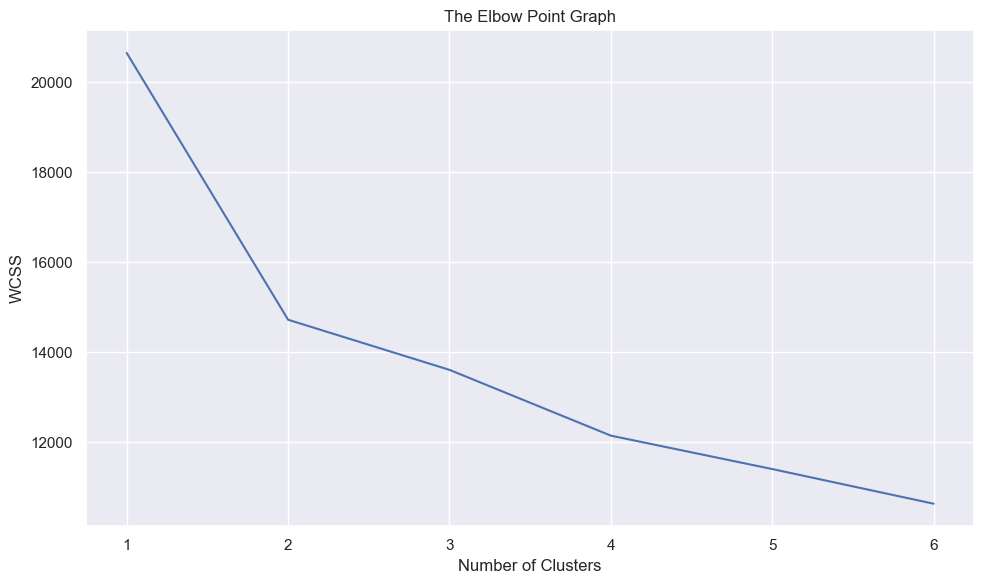

In [86]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset_prepared)
    wcss.append(kmeans.inertia_) 
    # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

f=plt.figure(figsize=(10,6))

plt.plot(range(1,7), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
f.tight_layout()
plt.show()

For this result, we use k-means with 3 clusters.

In [87]:
#model
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)
kmeans.fit(dataset_prepared)
labels = kmeans.labels_


#We insert the clusters into another dataset created
Dataset2 = Dataset.copy()
Dataset2['clusters'] = kmeans.fit_predict(dataset_prepared)

Now that we've segmented the customers, we can find the pattern for each customer group.

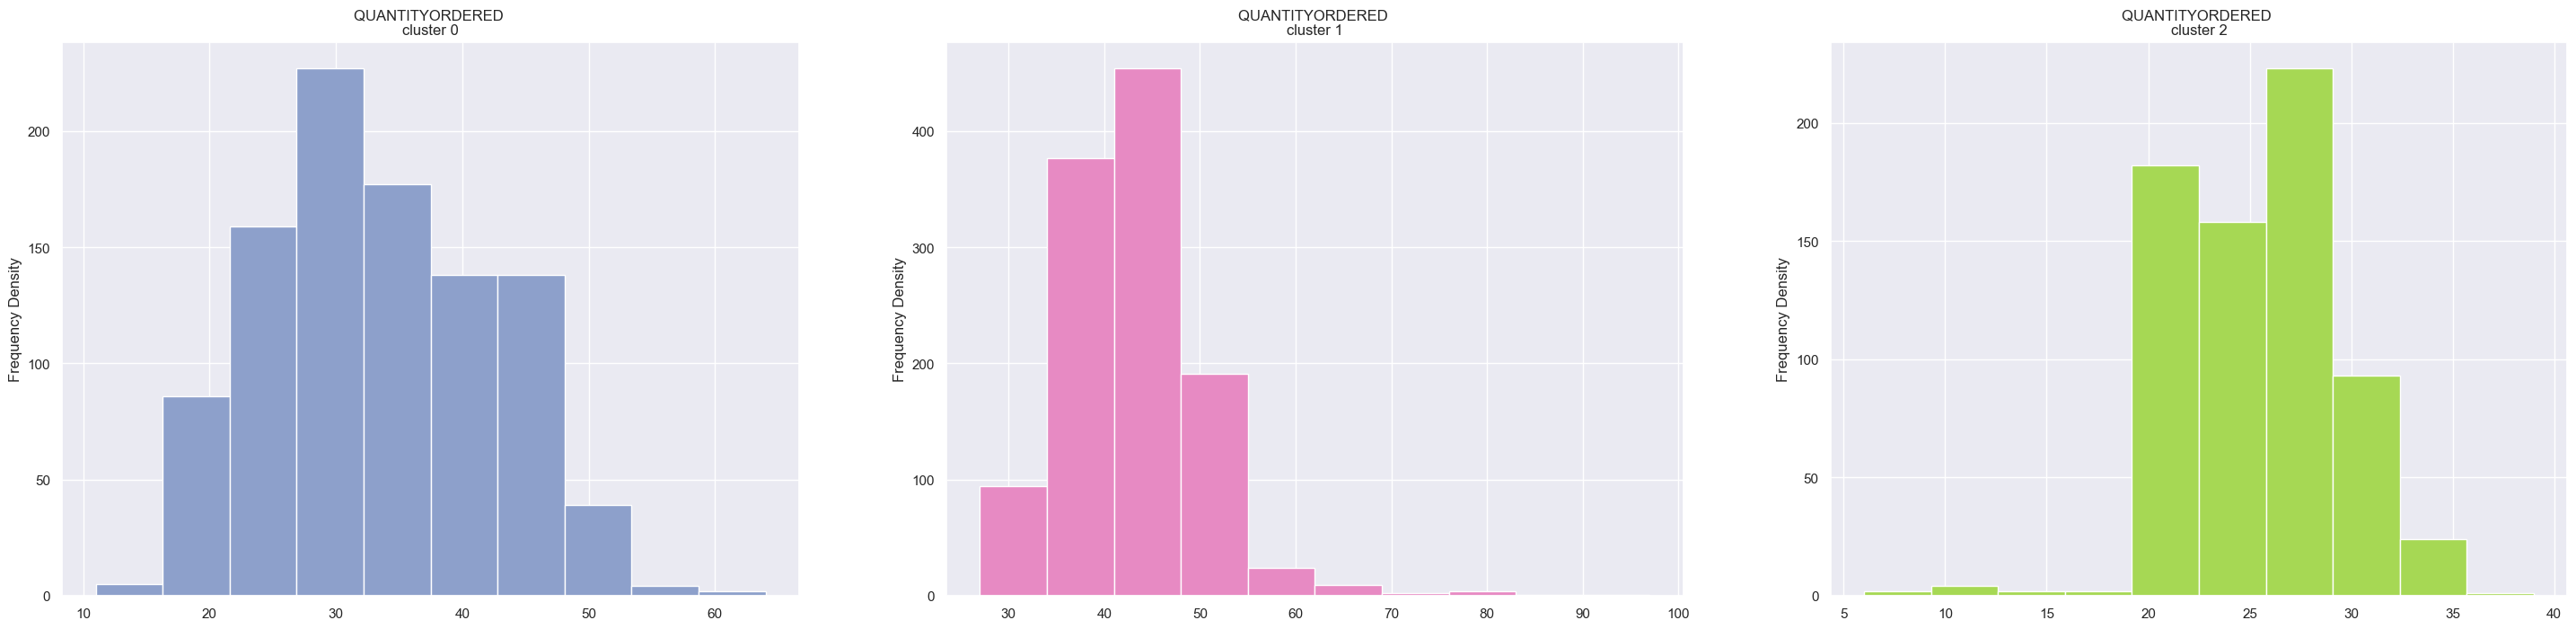

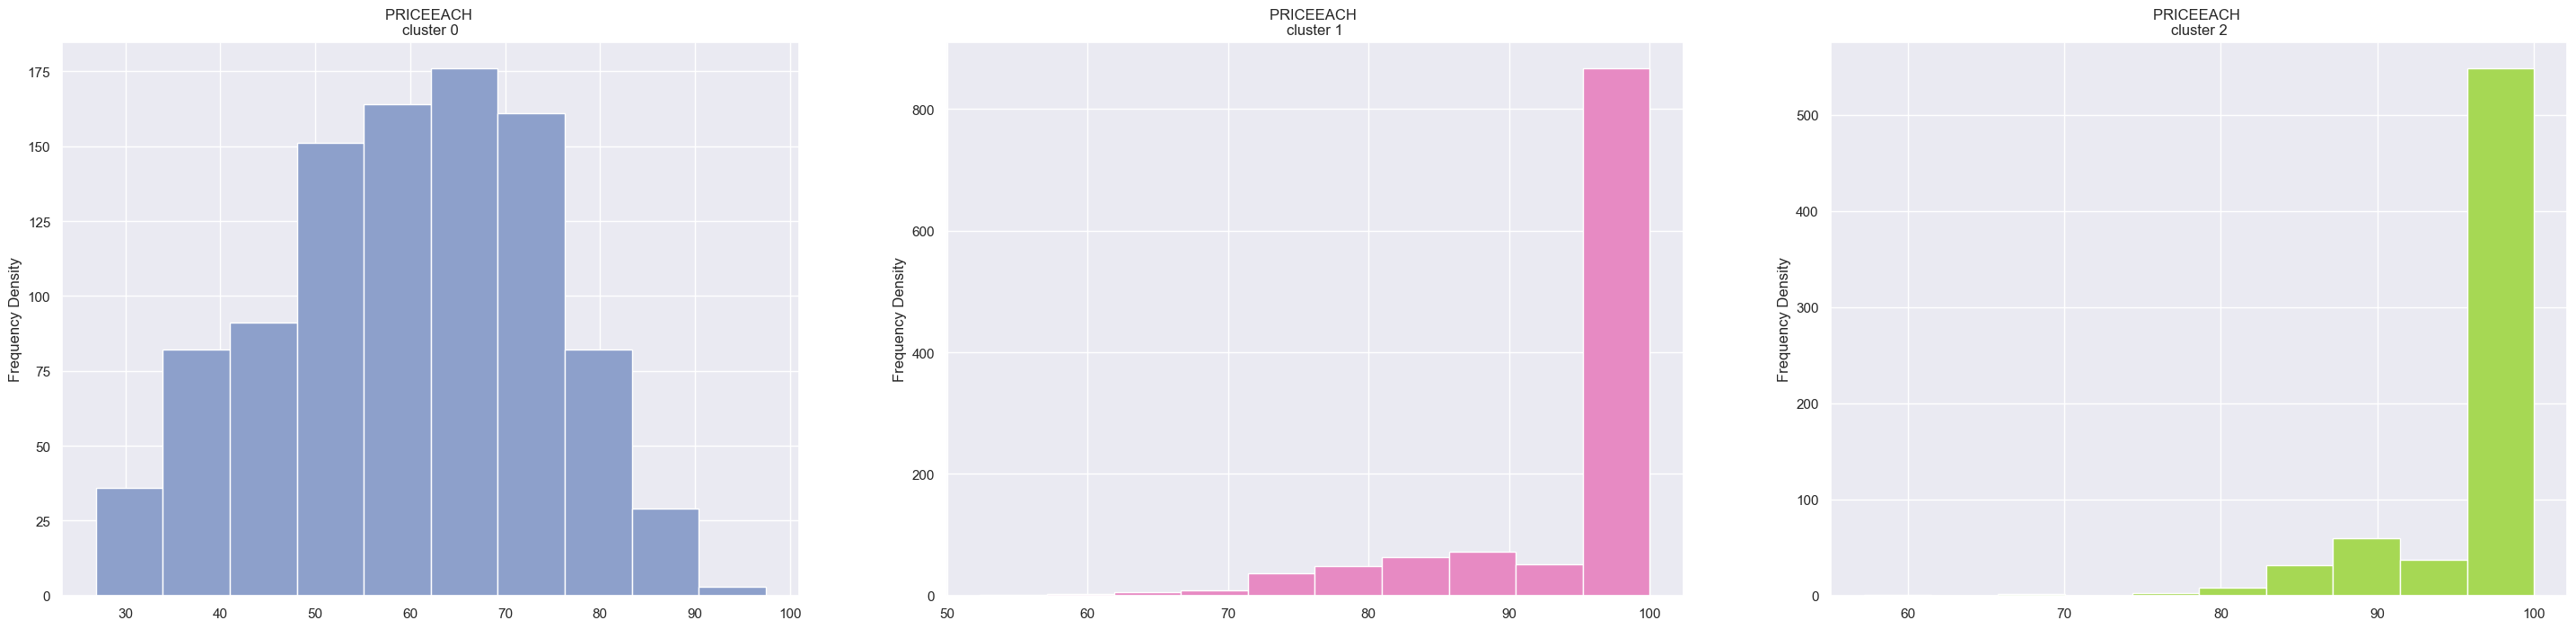

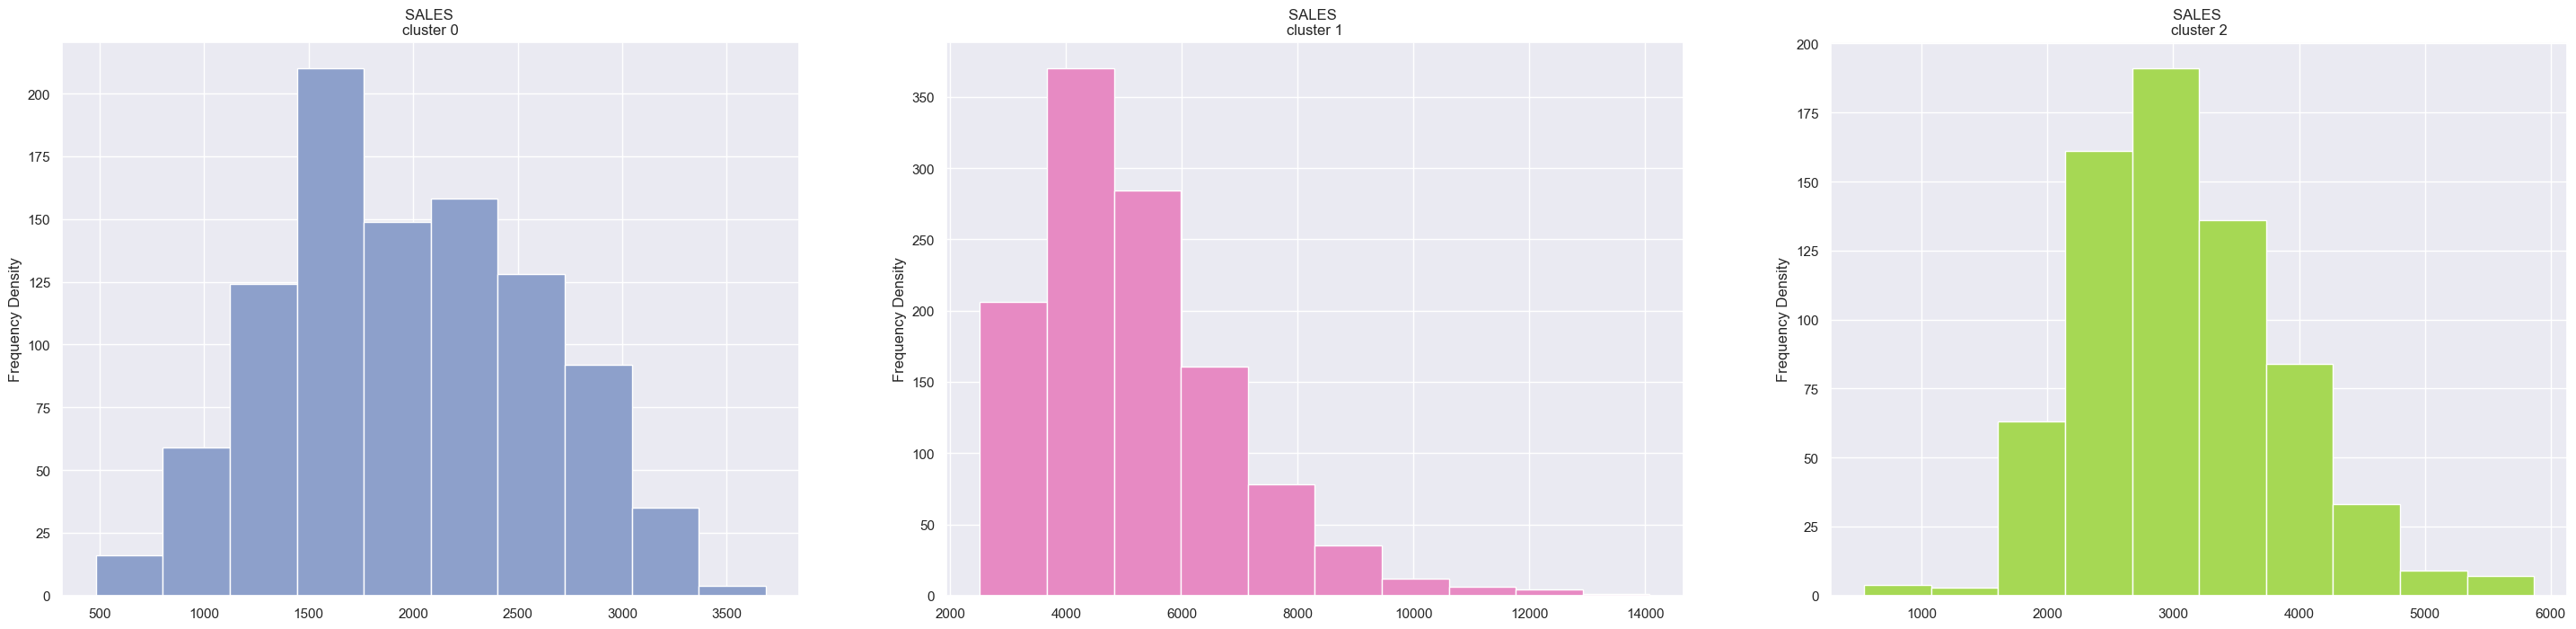

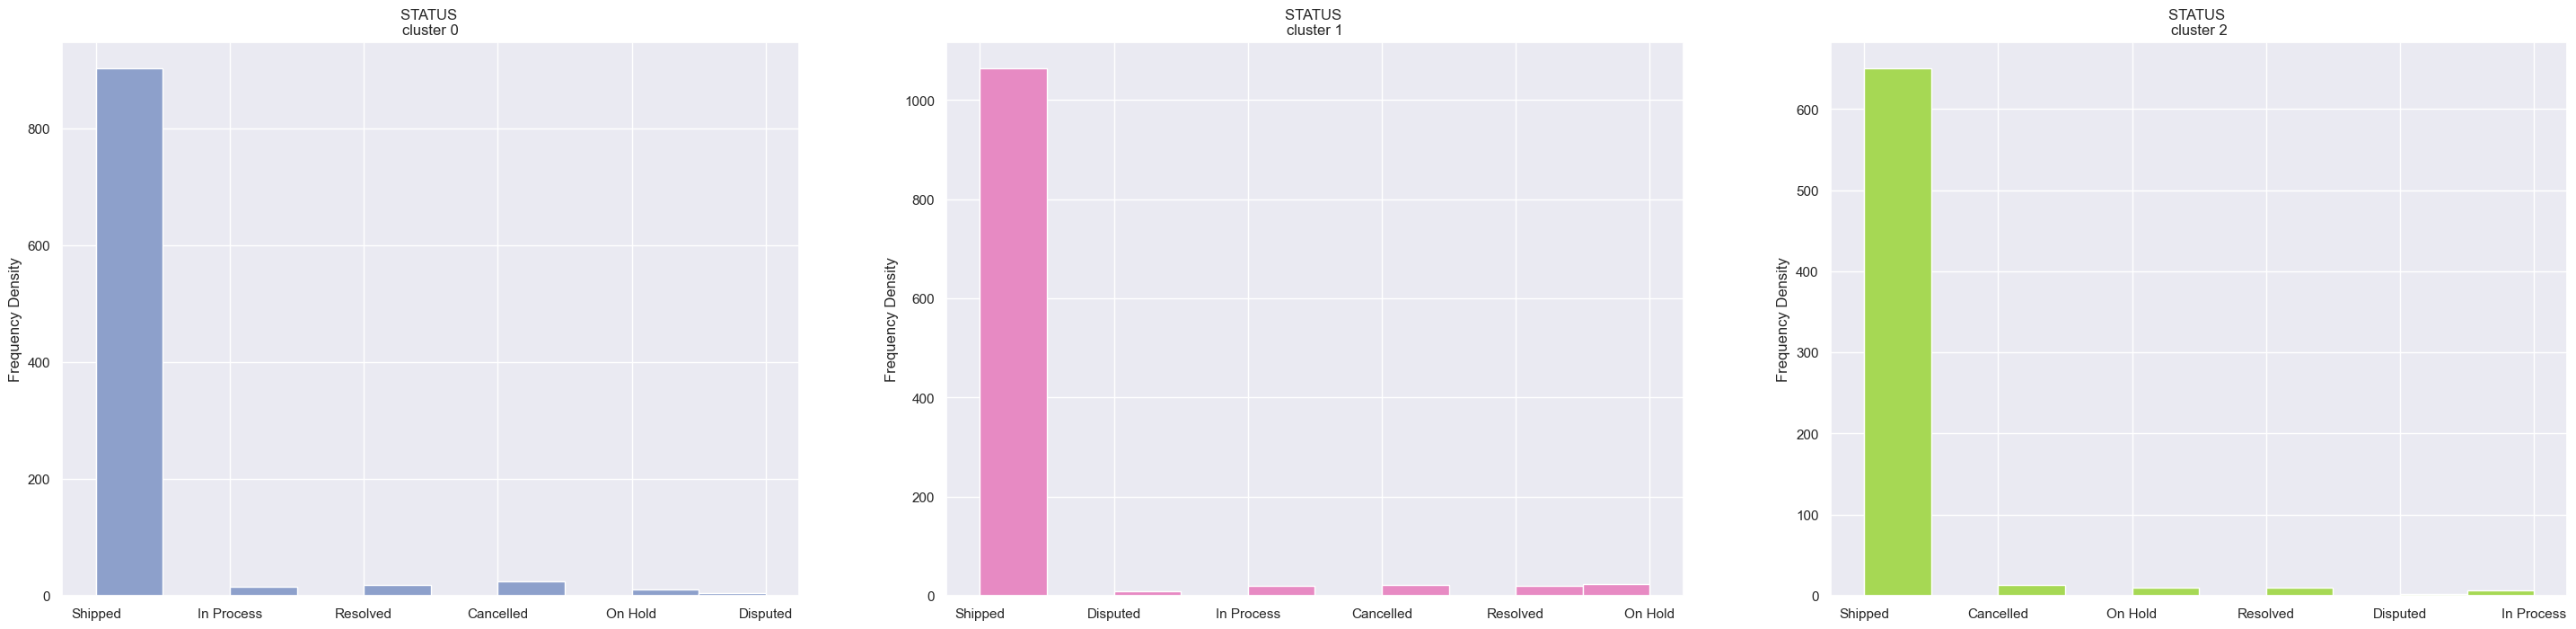

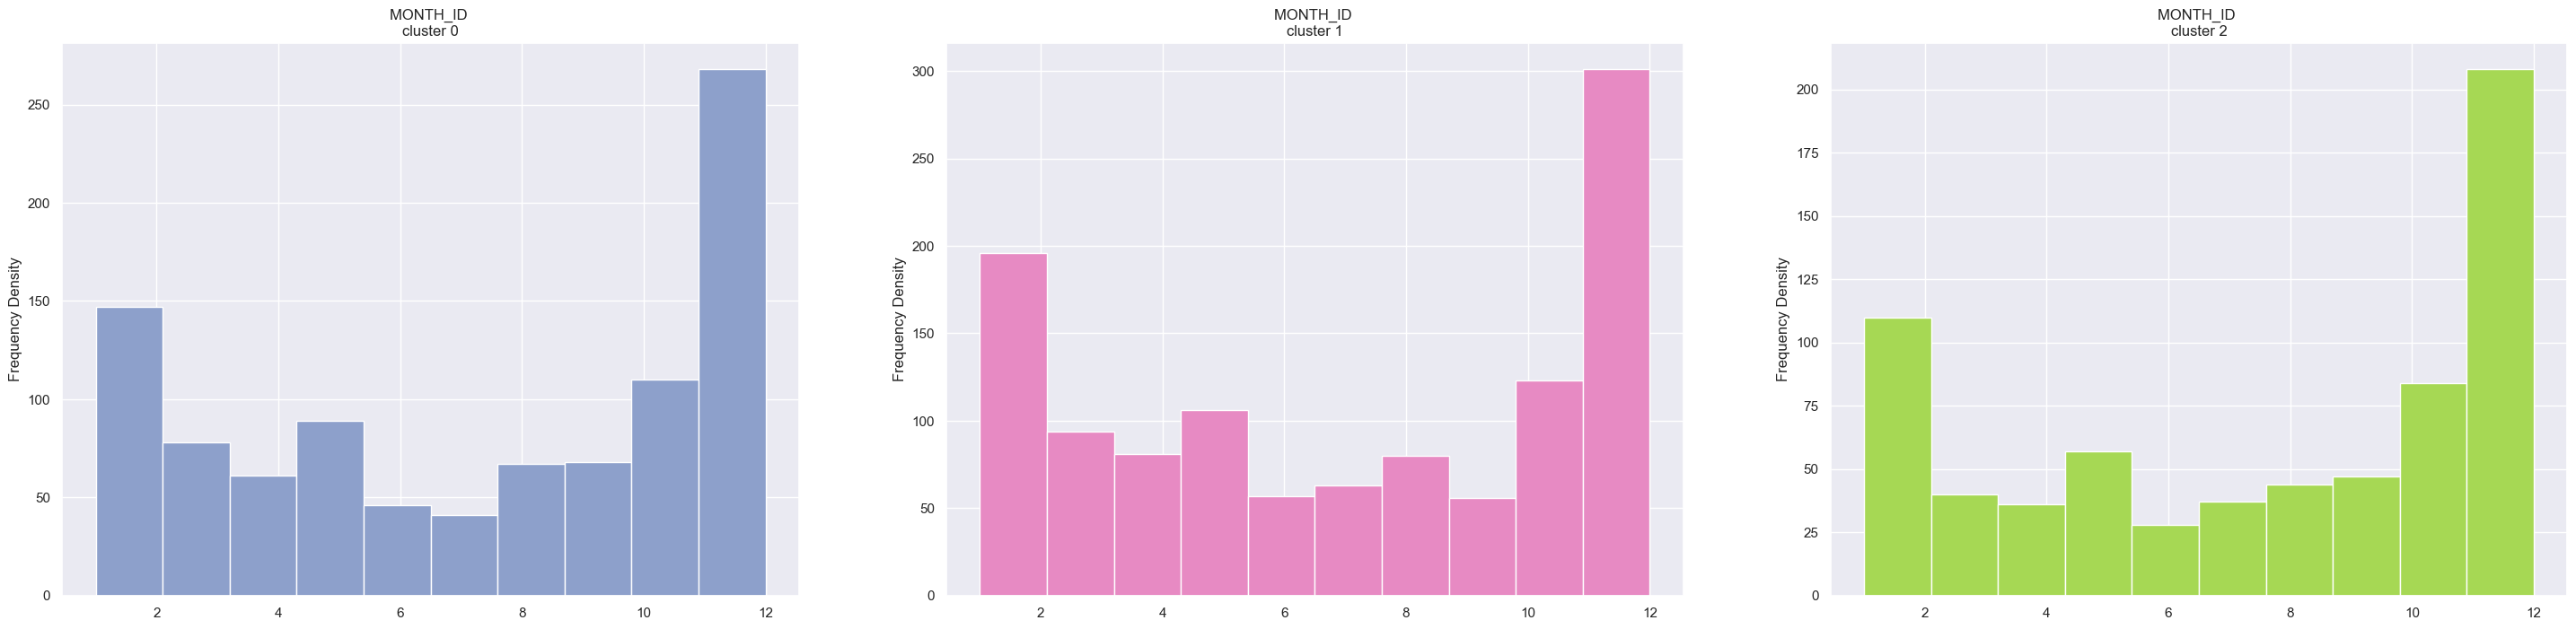

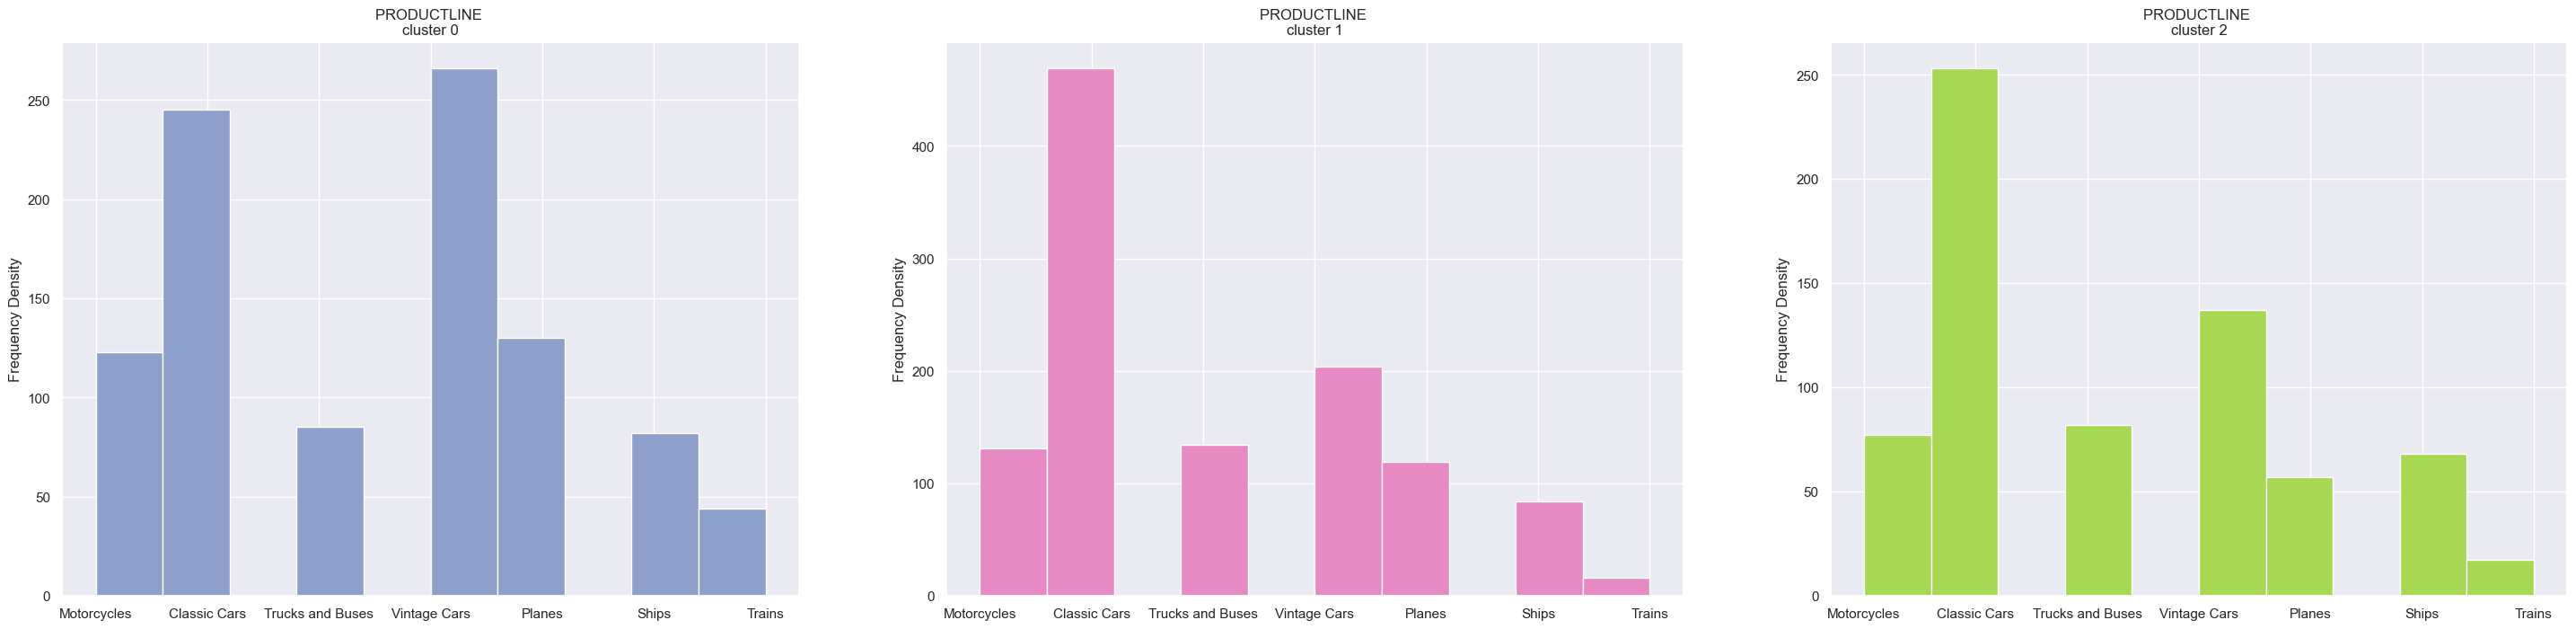

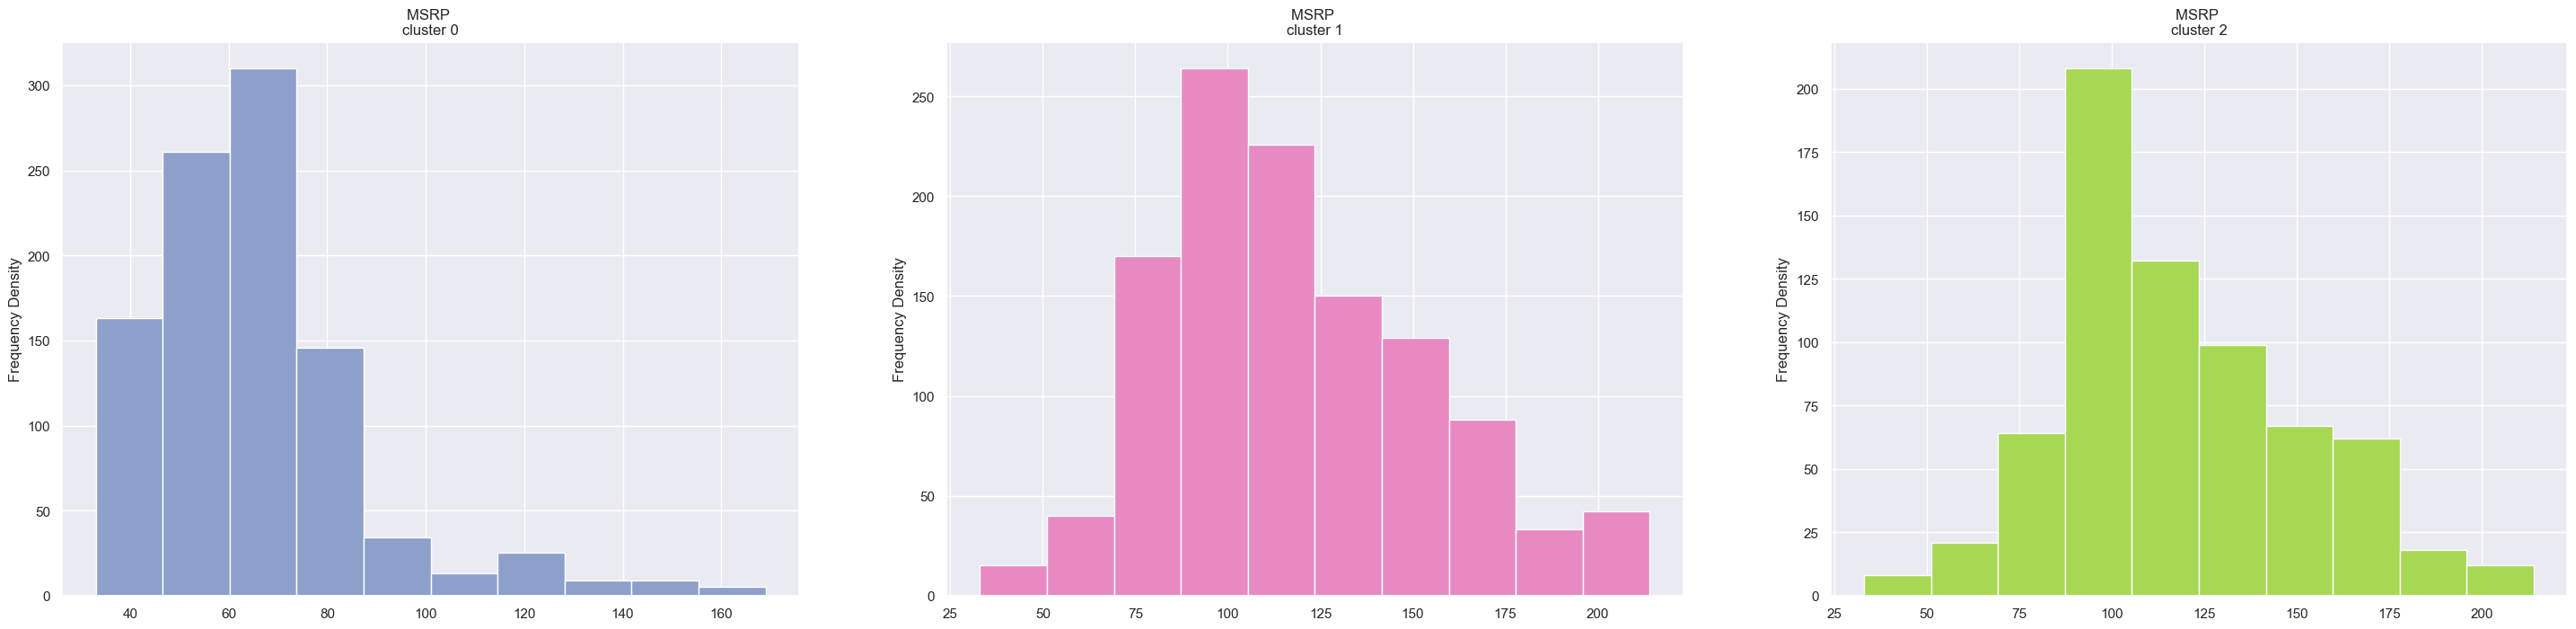

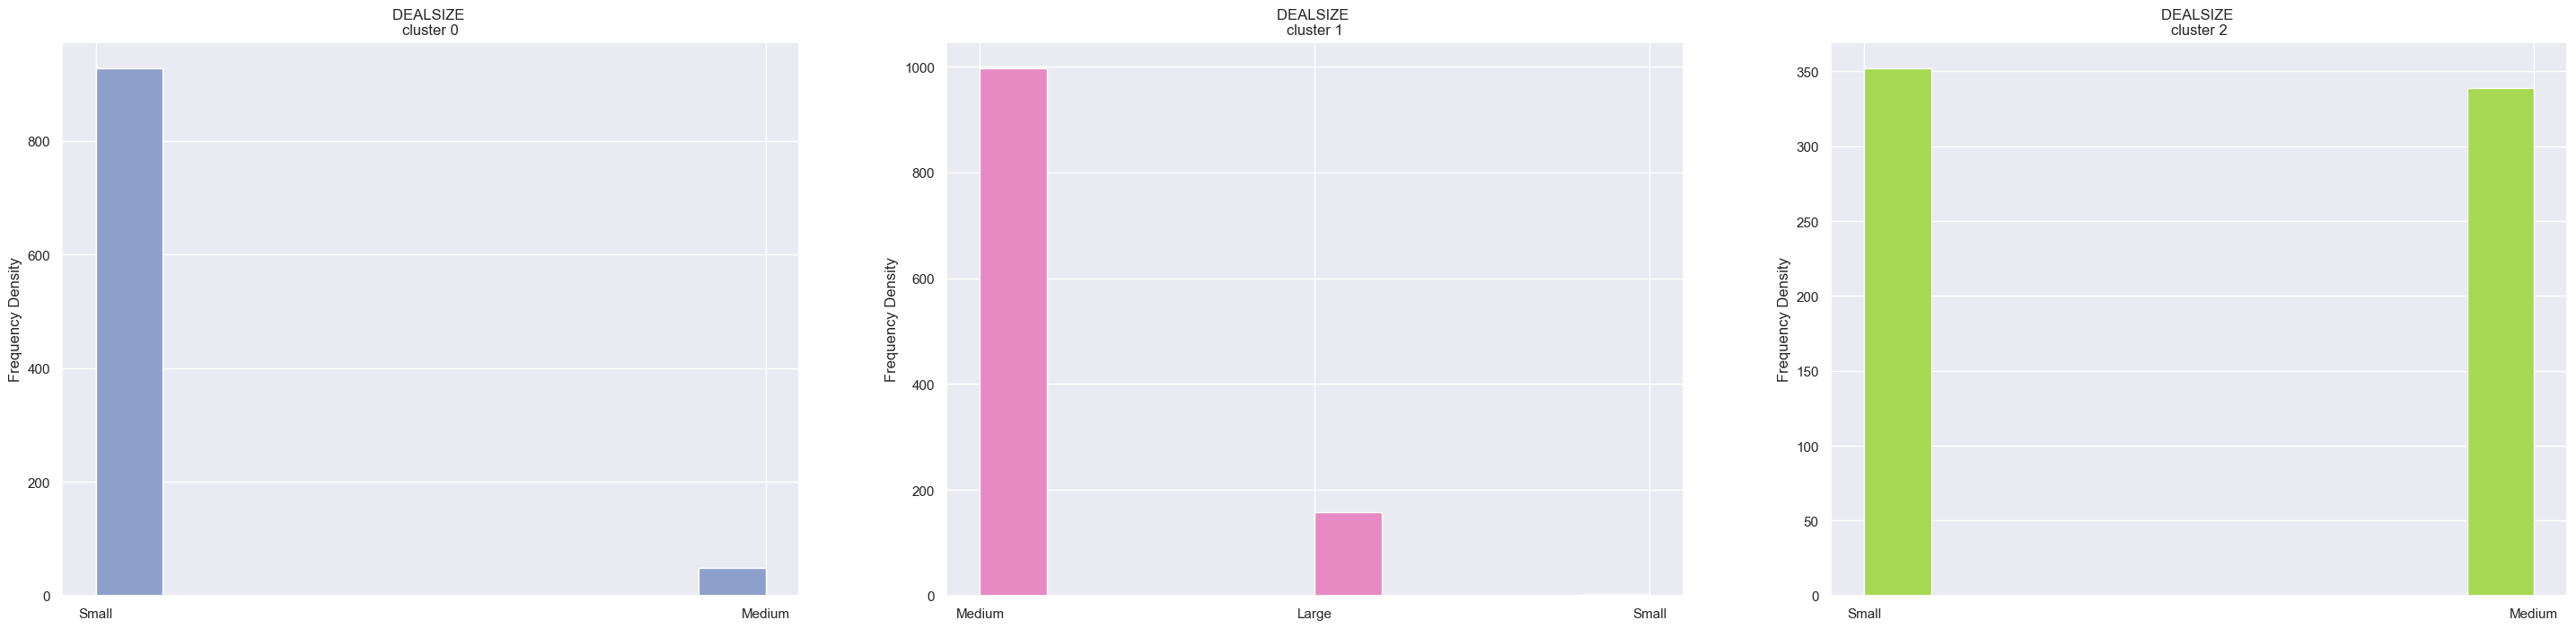

In [88]:
Dataset3 = Dataset2.drop('COUNTRY',axis=1).copy()#we removed a column difficult to paint

#color map for plotting
cmap1 = mpl.cm.Set2

# plot histogram for each feature based on cluster 
for i in Dataset3.columns[:8]:
    plt.figure(figsize=(36,8))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = Dataset3[Dataset3['clusters']==j]
        cluster[i].hist(color=cmap1(j + 2))
        plt.ylabel('Frequency Density')
        plt.title('{} \ncluster {}'.format(i,j))
plt.show()

Cluster (0): This group orders an average of 27.5 goods, with each item priced around $100. Their total expenditure is approximately $3,000. The highest purchasing activity occurs in December, and the most popular product line is classic cars. The agreements made with this group tend to be medium to small in size.

Cluster (1): Members of this cluster typically order about 45 items, also primarily in the $100 price range, resulting in total purchases around $4,000. Like the previous group, their buying patterns peak in December, with classic cars being the most frequently purchased product line. The agreements with this group are generally medium-sized.

Cluster (2): In this cluster, individuals order around 30 goods, with a preference for products priced at approximately $65, leading to total purchases of about $1,600. This group also shows a tendency to buy more in December, with vintage cars as the most sought-after product line. The agreements made with these customers are usually small.

### 5.5 - Viewing the clusters

To solve the problem of more features, dimensionality reduction through the PCA (Principal Component Analysis) altorhythm should be used. The features are rotated in the direction of greater variance that we call principal components, as they become the first dimension, something similar occurs until the desired dimension.


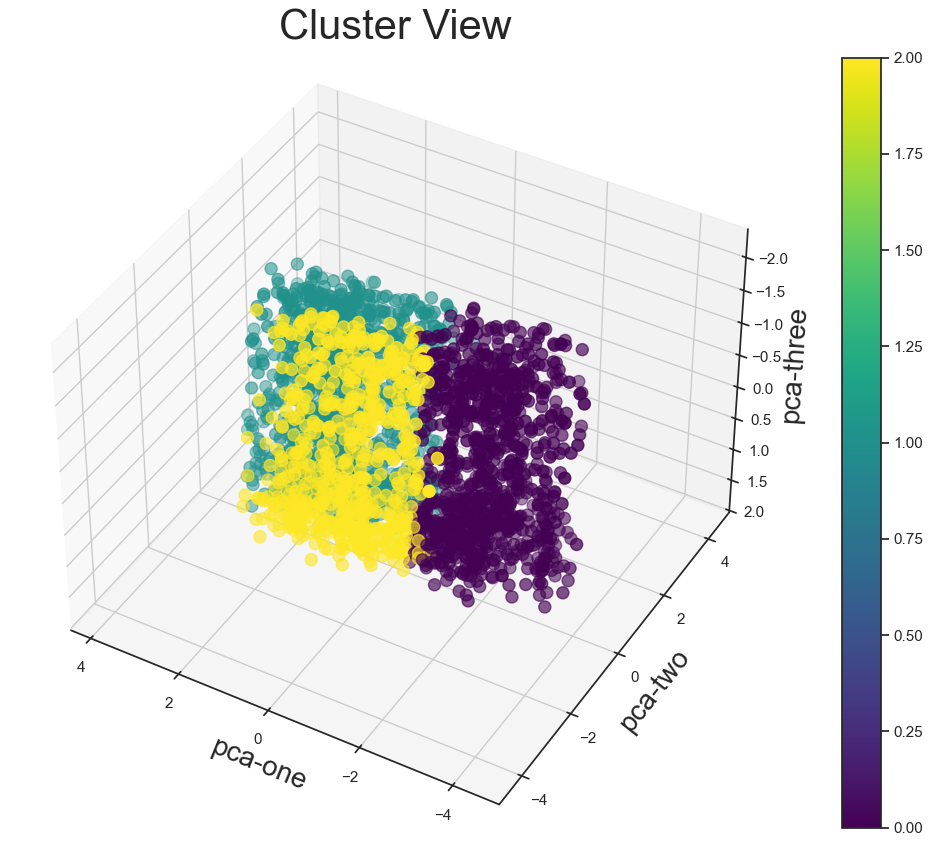

In [89]:
from sklearn.decomposition import PCA
from matplotlib import colorbar


sns.set_theme(style="white")

#choose the dimension
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(dataset_prepared)#fit the model on the data

#create a dictionary with all the information we want to plot
thisdict = {
  "pca1": principal_comp[:,0],
  "pca2": principal_comp[:,1],
  "pca3": principal_comp[:,2],
  'cluster': labels
}

#we create the dataframe from the dictionary
pca_df = pd.DataFrame(thisdict)

#set the fig size and take the figure
fig = plt.figure(figsize=(16,10))

#set a 3d plot on the axes
ax = fig.add_subplot(111, projection='3d')

#plot
p = ax.scatter(
    xs=pca_df['pca1'], ys=pca_df['pca2'], zs=pca_df['pca3'], 
    c=labels,s=75,
    cmap='viridis'
)

#labels ans titles
ax.set_xlabel('pca-one',fontsize = 20)
ax.set_ylabel('pca-two',fontsize = 20)
ax.set_zlabel('pca-three',fontsize = 20)
ax.view_init(-140, 60)

plt.title('Cluster View',fontsize = 30,x=0.5, y=1.1)

#side color bar
fig.colorbar(p, ax=ax)

plt.show()


## 6 - To Deploy

Now let's save the model, to deploy it later.

In [90]:
import pickle

### 6.1 - Final Pipeline

In [91]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("kmeans", KMeans(n_clusters=3, init='k-means++',random_state=0))
    ])

full_pipeline_with_predictor.fit(Dataset)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('PowerTransformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['QUANTITYORDERED',
                                                   'PRICEEACH', 'SALES',
                                                   'MONTH_ID', 'MSRP']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['STATUS', 'PRODUCTLINE',
                                                   'COUNTRY', 'DEALSIZE'])])),
                ('kmeans', KMeans(n_clusters=3, random_state=0))])

### 6.2 - Saving the trained model

In [96]:
model = full_pipeline_with_predictor


filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))




filename1 = 'trained_model_new.sav'
pickle.dump(grid_search.best_estimator_, open(filename1, 'wb'))

test the model

In [97]:
loadModel = pickle.load(open(filename, 'rb'))

Y = loadModel.predict(Dataset)

print(Y)

[2 0 1 ... 1 0 0]


#7. Using Deep learning with autoencoder


In [98]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [99]:
# Define the input layer
input_layer = Input(shape=(dataset_prepared.shape[1],))  

# Define the encoding layers
encoded = Dense(128, activation='relu')(input_layer)  
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded) 

# Define the decoding layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(dataset_prepared.shape[1], activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

In [100]:
autoencoder.fit(dataset_prepared, dataset_prepared, epochs=50, batch_size=32)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2579
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1345
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1131
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0990
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0922
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0892
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0851
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0875
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0848
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0831
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0836
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0839
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0821
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0827
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0842
Epoch 16/50
89/89 ━

In [101]:
encoder = Model(input_layer, encoded) 
encoded_data = encoder.predict(dataset_prepared)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [102]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(encoded_data)
labels = kmeans.labels_

# Insert the clusters into your dataset
Dataset2['clusters'] = labels

In [103]:
from sklearn.metrics import silhouette_score

# Normal KMeans model
kmeans_normal = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans_normal.fit(dataset_prepared)
labels_normal = kmeans_normal.labels_
inertia_normal = kmeans_normal.inertia_
silhouette_normal = silhouette_score(dataset_prepared, labels_normal)

# Deep learning model (autoencoder + KMeans)
# ... (code from previous responses) ...
inertia_deep = kmeans.inertia_
silhouette_deep = silhouette_score(encoded_data, labels) 

# Print the results
print("Normal KMeans - Inertia:", inertia_normal)
print("Normal KMeans - Silhouette Score:", silhouette_normal)
print("Deep Learning Model - Inertia:", inertia_deep)
print("Deep Learning Model - Silhouette Score:", silhouette_deep)

Normal KMeans - Inertia: 13046.74674046758
Normal KMeans - Silhouette Score: 0.1848386047602937
Deep Learning Model - Inertia: 201068.59375
Deep Learning Model - Silhouette Score: 0.12526058


Hyper parameter tuning with K-means

In [104]:
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# No need for make_scorer here, you can directly use silhouette_scorer
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500],
}

grid_search = GridSearchCV(KMeans(), param_grid, cv=5, scoring=silhouette_scorer)
grid_search.fit(dataset_prepared)

print("Best parameters for KMeans:", grid_search.best_params_)
best_kmeans = grid_search.best_estimator_

Best parameters for KMeans: {'init': 'random', 'max_iter': 300, 'n_clusters': 2}


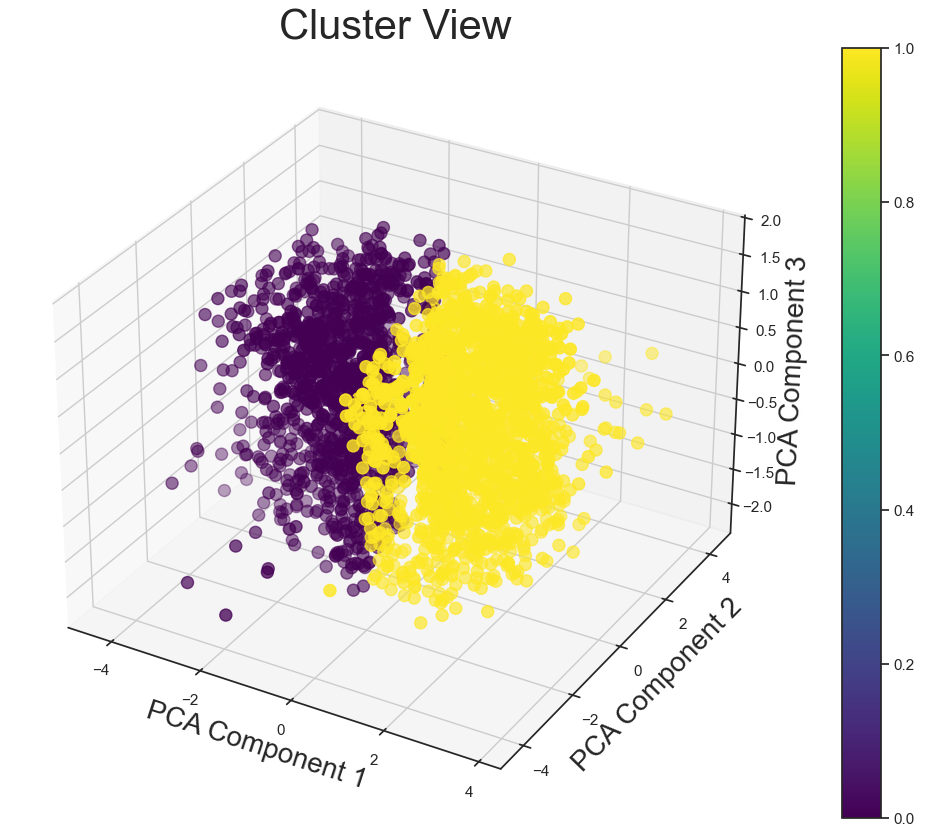

In [105]:
best_kmeans.fit(dataset_prepared)

# Make predictions and add clusters to the dataset
Dataset['clusters'] = best_kmeans.labels_

# Visualize the clusters using PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(dataset_prepared)

pca_df = pd.DataFrame({
    "pca1": principal_comp[:, 0],
    "pca2": principal_comp[:, 1],
    "pca3": principal_comp[:, 2],
    'cluster': best_kmeans.labels_
})

# Create a 3D plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['pca1'], pca_df['pca2'], pca_df['pca3'], 
                     c=pca_df['cluster'], s=75, cmap='viridis')
ax.set_xlabel('PCA Component 1', fontsize=20)
ax.set_ylabel('PCA Component 2', fontsize=20)
ax.set_zlabel('PCA Component 3', fontsize=20)
plt.title('Cluster View', fontsize=30)
fig.colorbar(scatter)
plt.show()

# Save the trained model
filename = 'trained_model.sav'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

# To load and test the model
# load_model = pickle.load(open(filename, 'rb'))
# Y = load_model.predict(dataset_prepared)
# print(Y)

In [106]:
kmeans_normal = KMeans(n_clusters=grid_search.best_params_['n_clusters'], init='k-means++', random_state=0)
kmeans_normal.fit(dataset_prepared)

# Calculate inertia and silhouette score
inertia_normal = kmeans_normal.inertia_
labels_normal = kmeans_normal.labels_
silhouette_normal = silhouette_score(dataset_prepared, labels_normal)

print("Normal KMeans - Inertia:", inertia_normal)
print("Normal KMeans - Silhouette Score:", silhouette_normal)

Normal KMeans - Inertia: 14721.39280234041
Normal KMeans - Silhouette Score: 0.25470534413827195


8. cLUSTER USING DEEP LEARNIGN AND HYPER PARAMETER TUNING


Best parameters for KMeans: {'init': 'random', 'max_iter': 300, 'n_clusters': 2}
Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3476
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1863
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1637
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1571
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1556
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1492
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1429
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1426
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1471
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1431
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1404
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1360
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1409
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1358
Epoc

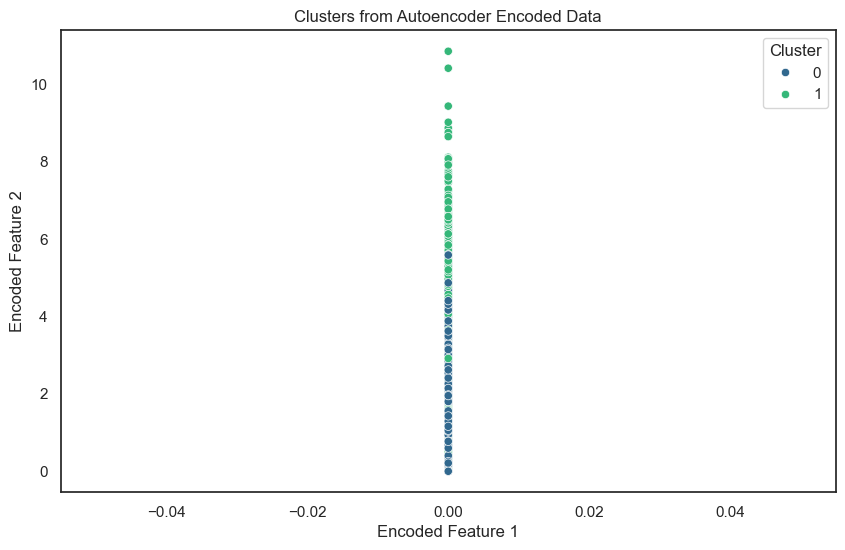

In [107]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.impute import SimpleImputer


CustomerDataset = pd.read_csv("D:\Customer-Segmentation_End-to-end-Project-master\sales_data_sample.csv")


CustomerDataset['ORDERDATE'] = pd.to_datetime(CustomerDataset['ORDERDATE'])
CustomerDataset['ORDERDATE_NUMERIC'] = (CustomerDataset['ORDERDATE'] - CustomerDataset['ORDERDATE'].min()).dt.days


to_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY',
            'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME',
            'ORDERNUMBER', "ORDERDATE", "QTR_ID", "ORDERLINENUMBER", "YEAR_ID", "PRODUCTCODE"]
Dataset = CustomerDataset.drop(to_drop, axis=1)


numeric_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'ORDERDATE_NUMERIC']
categorical_features = ['STATUS', 'PRODUCTLINE', 'DEALSIZE']


numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

dataset_prepared = preprocessor.fit_transform(Dataset)




def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)


param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500],
}

grid_search = GridSearchCV(KMeans(), param_grid, cv=5, scoring=silhouette_scorer)
grid_search.fit(dataset_prepared)

print("Best parameters for KMeans:", grid_search.best_params_)
best_kmeans = grid_search.best_estimator_


input_layer = Input(shape=(dataset_prepared.shape[1],))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(dataset_prepared.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(dataset_prepared, dataset_prepared, epochs=50, batch_size=32)


encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(dataset_prepared)


kmeans_deep = KMeans(n_clusters=grid_search.best_params_['n_clusters'], 
                     init=grid_search.best_params_['init'], 
                     max_iter=grid_search.best_params_['max_iter'])
kmeans_deep.fit(encoded_data)


Dataset['Cluster'] = kmeans_deep.labels_


plt.figure(figsize=(10, 6))
sns.scatterplot(x=encoded_data[:, 0], y=encoded_data[:, 1], hue=Dataset['Cluster'], palette='viridis')
plt.title('Clusters from Autoencoder Encoded Data')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.show()


In [108]:
inertia_deep = kmeans_deep.inertia_
labels_deep = kmeans_deep.labels_
silhouette_deep = silhouette_score(encoded_data, labels_deep)

print("Deep Learning Model - Inertia:", inertia_deep)
print("Deep Learning Model - Silhouette Score:", silhouette_deep)

Deep Learning Model - Inertia: 173589.46875
Deep Learning Model - Silhouette Score: 0.240629
